<a href="https://colab.research.google.com/github/Rasna-k/python-practice/blob/main/NetflixStockAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix Stock Analysis**

## Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
netflix=pd.read_csv('https://raw.githubusercontent.com/Rasna-k/datasets/main/NFLX.csv')
netflix.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


## Analysing Data

In [ ]:
netflix.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
netflix.shape

(4874, 7)

In [4]:
netflix.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4874.000000,4874.000000,4874.000000,4874.000000,4874.000000,4.874000e+03
mean,104.644811,106.243736,103.006660,104.686524,104.686524,1.681687e+07
std,155.886656,158.173217,153.546958,155.940368,155.940368,1.937625e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.901429,3.977143,3.835357,3.905714,3.905714,6.301225e+06
50%,21.386429,21.816429,20.935714,21.233572,21.233572,1.084630e+07
75%,125.445000,126.592499,122.987499,125.097502,125.097502,2.016192e+07
max,608.049988,619.000000,608.049988,610.340027,610.340027,3.234140e+08


In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4874 entries, 0 to 4873
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4874 non-null   object 
 1   Open       4874 non-null   float64
 2   High       4874 non-null   float64
 3   Low        4874 non-null   float64
 4   Close      4874 non-null   float64
 5   Adj Close  4874 non-null   float64
 6   Volume     4874 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 266.7+ KB


Therefore, no null values

But the data ids not in correct format
THerefore convert it

## Questions

**1. Volume of Stock Traded**

In [5]:
sns.set(rc={'figure.figsize':(10,5)})

In [6]:
netflix['Date']=pd.to_datetime(netflix['Date'])
netflix=netflix.set_index('Date')
netflix.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


Text(0.5, 1.0, 'Volume of stock vs. Time')

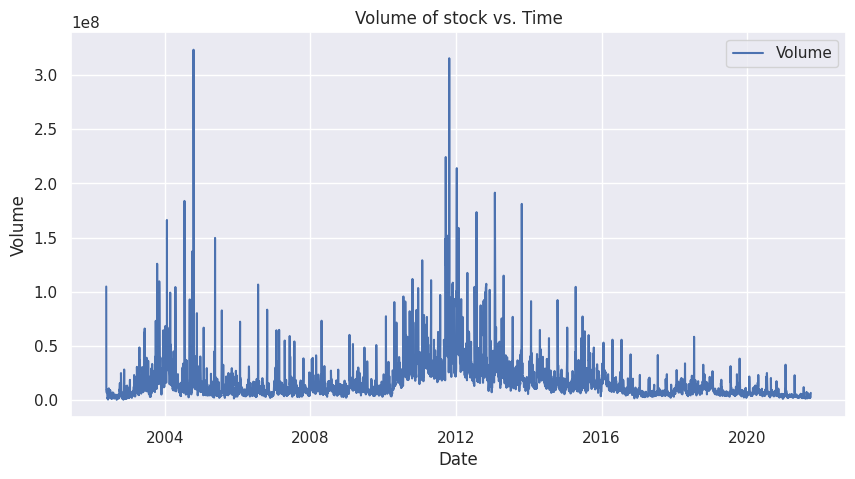

In [9]:
sns.lineplot(x=netflix.index,y=netflix.Volume,label='Volume')
plt.title("Volume of stock vs. Time")

Inference:
Volume of stock was highest in year 2004

**2. Netflix Stock Price -High, Open, Close**

Text(0.5, 1.0, 'Netflix Stock Price')

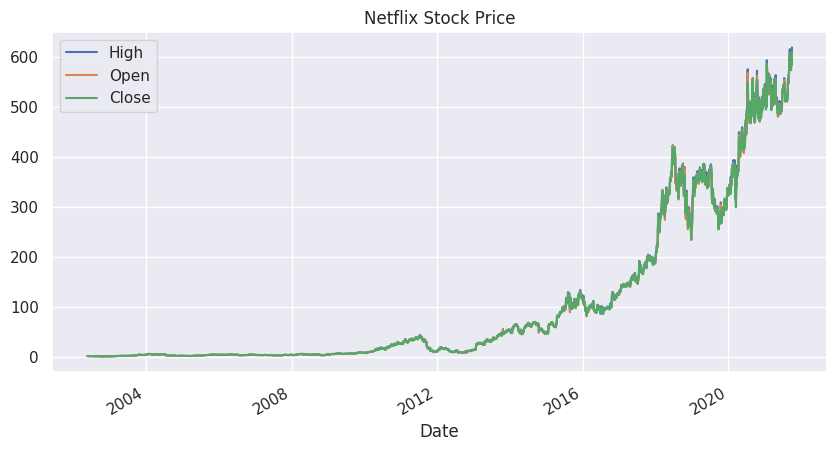

In [12]:
netflix.plot(y=['High','Open','Close'])
plt.title("Netflix Stock Price")

**3.Netflix Stock Price - DAy , Month , Year wise**

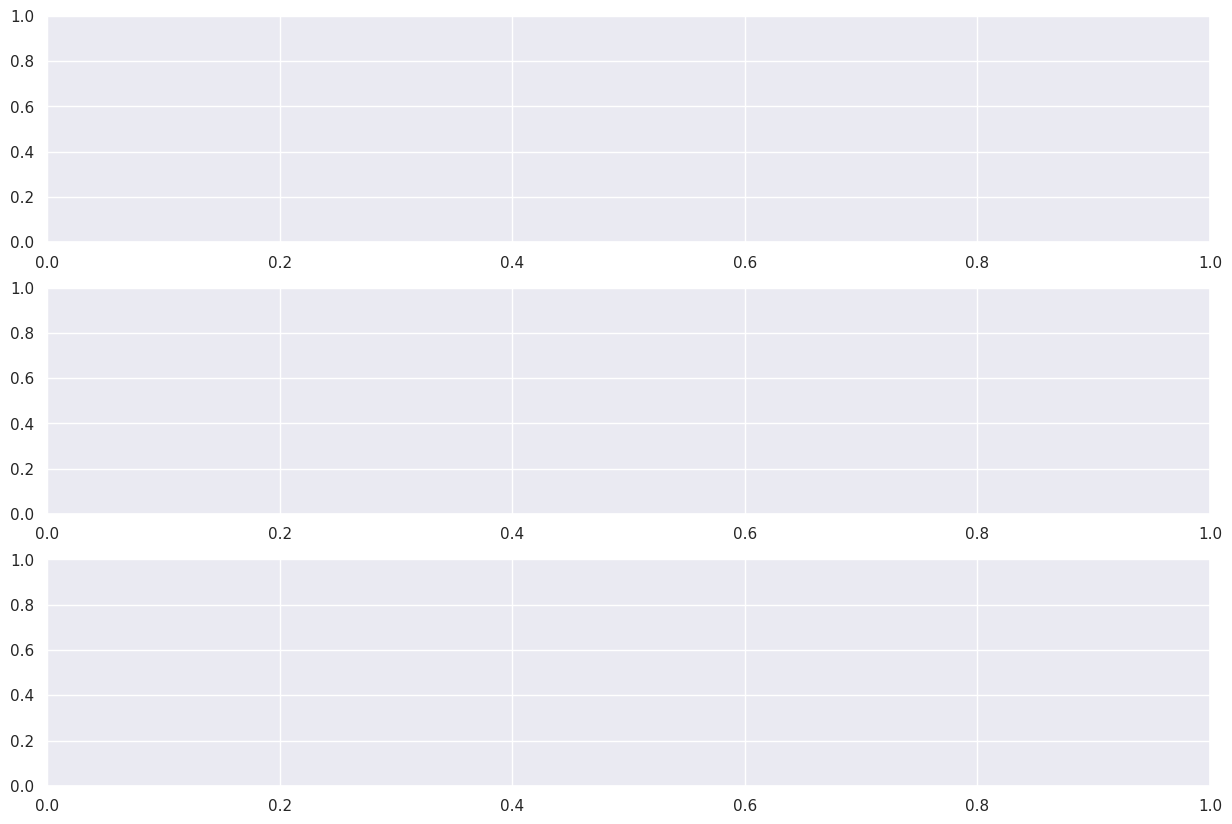

In [22]:
fig,(ax1,ax2,ax3)=plt.subplots(3,figsize=(15,10))

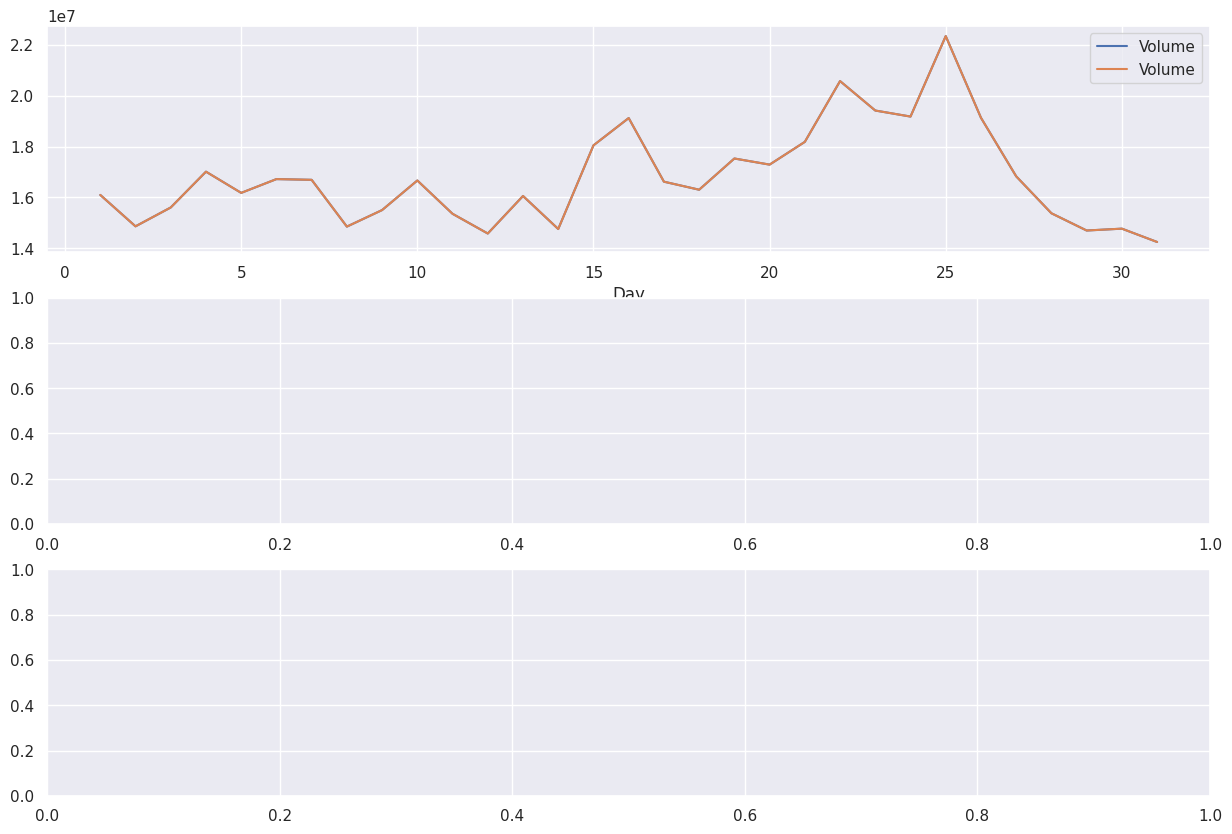

In [24]:
netflix.groupby(netflix.index.day).mean().plot(y='Volume',ax=ax1,xlabel='Day')
fig

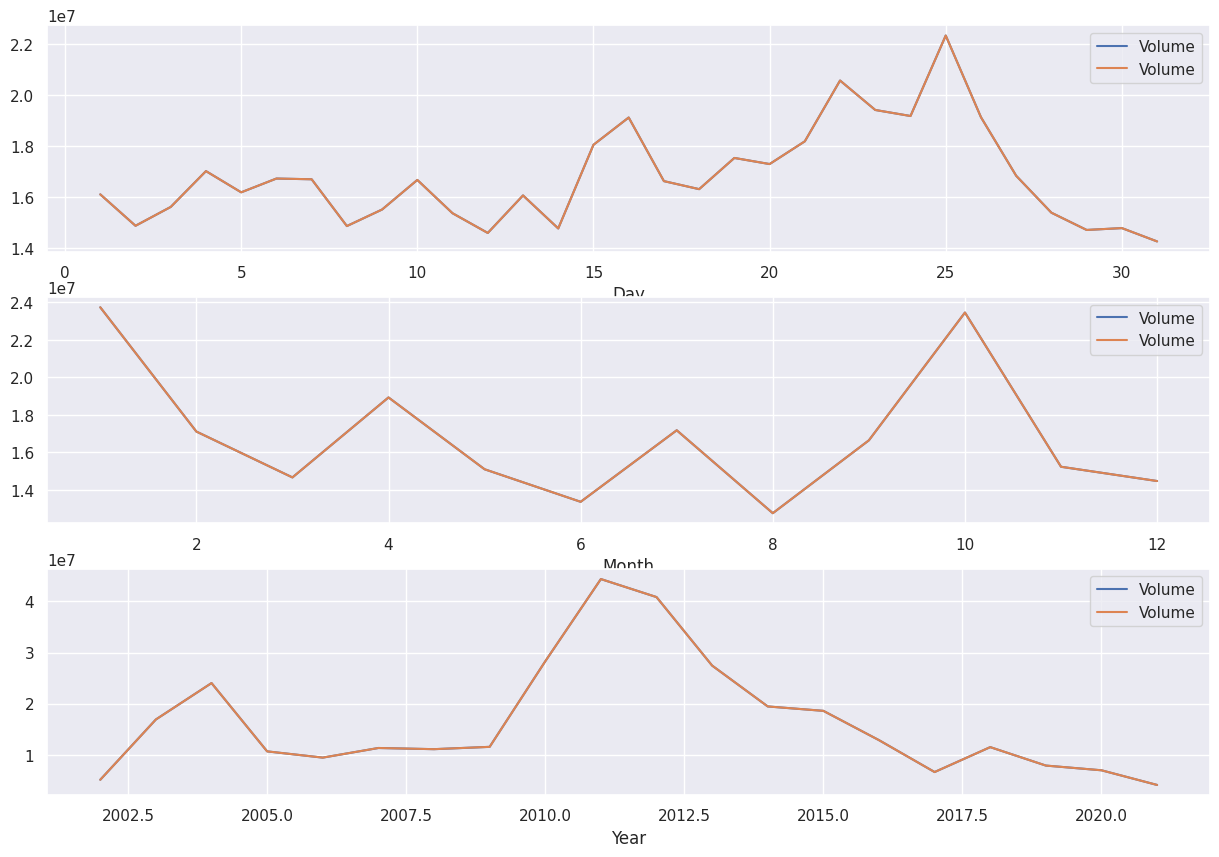

In [26]:
netflix.groupby(netflix.index.month).mean().plot(y='Volume',ax=ax2,xlabel='Month')
netflix.groupby(netflix.index.year).mean().plot(y='Volume',ax=ax3,xlabel='Year')
fig

Inference:
1.   Highest Stock price is on 25th day of the month
2.   Stock price was greater in jan but then decreased and was highest in October
3.  Stock Price was increasing during 2007-2010 and was highest in 2011 and was lowest in 2017-2020




**4.Top-5 Dates with highest Stock Price**

In [34]:
a=netflix.sort_values(by='High',ascending=False).head()
a['High']

Date
2021-09-30    619.000000
2021-09-08    615.599976
2021-09-07    613.849976
2021-09-29    609.880005
2021-09-10    609.450012
Name: High, dtype: float64

<BarContainer object of 5 artists>

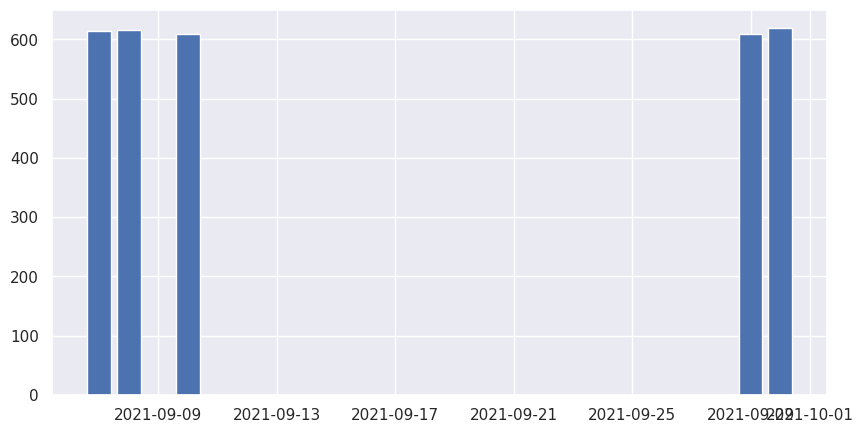

In [36]:
plt.bar(a.index,a['High'])

**5.Top 5 Dates with lowest stock prices**

In [38]:
a=netflix.sort_values(by='Low').head()
a['Low']

Date
2002-10-10    0.346429
2002-10-09    0.347143
2002-10-07    0.382143
2002-10-08    0.390714
2002-10-16    0.442857
Name: Low, dtype: float64

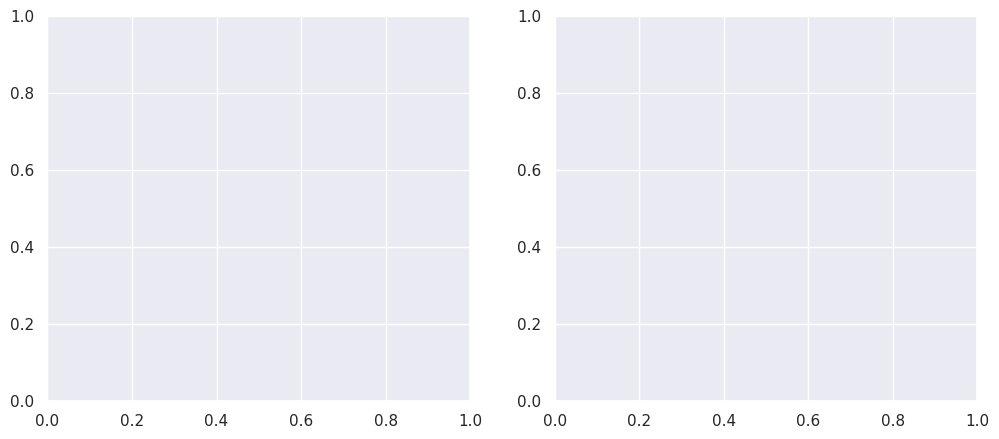

In [41]:
fig,axes=plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(12,5))

In [44]:
fig.suptitle('High and Low Values Stock per period of time ')

Text(0.5, 0.98, 'High and Low Values Stock per period of time ')

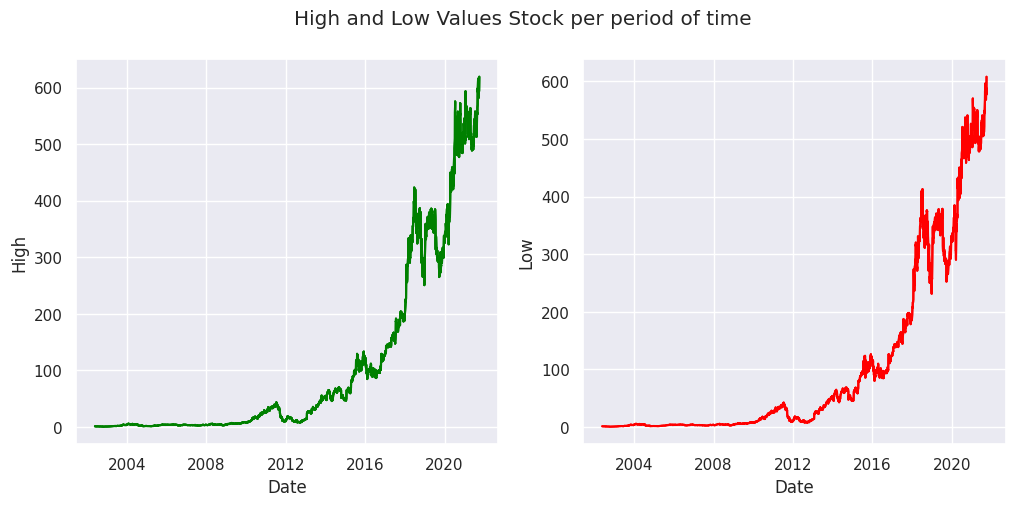

In [49]:
sns.lineplot(ax=axes[0],y=netflix['High'],x=netflix.index,color='green')
sns.lineplot(ax=axes[1],y=netflix['Low'],x=netflix.index,color='red')
fig